In [24]:
#IMPROVING TREE

In [29]:
# Analiza i modyfikacja danych
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ewaluacja
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, classification_report
from sklearn.metrics import recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
# machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import GridSearchCV

In [26]:

def read_grouped_data():
    df = pd.read_csv('data/final_data.csv')
    return df.drop(columns=df.columns[0], axis=1)
    
def calculate_feeling_rate_distribution(df):
    print('DATA:')
    count = df.count()[0]
    data = []
    numbers = df['feeling_rate'].unique()
    for i in numbers:
        occur = df['feeling_rate'].value_counts()[i]
        percent = (occur / count) * 100
        value = round(percent, 2)
        data.append(value)
        print(str(i) + ' ' + str(round(percent, 2)) + '%')
        
    fig, ax = plt.subplots()
    ax.pie(data, labels=numbers, autopct='%1.1f%%')


def print_df_information(df):
    print(df.head())
    print(df.info())
    print(df.describe())


def change_txt_data(df):
    print(df.describe(include=['O']))
    categoricals = list(df.select_dtypes(include=['O']).columns)
    encoder = OneHotEncoder(sparse_output=False)
    encoded = encoder.fit_transform(df[categoricals])
    train_ohe = pd.DataFrame(encoded, columns=np.hstack(encoder.categories_))
    df = pd.concat((df, train_ohe), axis=1).drop(categoricals, axis=1)
    print(df.head())
    return df


       time_of_day
count         4545
unique           6
top           Noon
freq          1142
   steps  heart_rate  raw_intensity  feeling_rate  Early Morning  Evening  \
0      0      115.00          16.00             4            0.0      0.0   
1    181       91.98          37.96             4            0.0      0.0   
2     65       85.43          36.16             4            0.0      0.0   
3     35       87.56          33.18             4            0.0      0.0   
4    397       84.00          49.94             4            0.0      0.0   

   Late Night  Morning  Night  Noon  
0         0.0      1.0    0.0   0.0  
1         0.0      0.0    0.0   1.0  
2         0.0      0.0    0.0   1.0  
3         0.0      0.0    0.0   1.0  
4         0.0      0.0    0.0   1.0  
DATA:
4 64.53%
3 21.23%
2 3.15%
5 8.03%
1 3.06%
Fitting 5 folds for each of 224 candidates, totalling 1120 fits


DecisionTreeClassifier(ccp_alpha=0.001, max_depth=7, random_state=1024,
                       splitter='random')

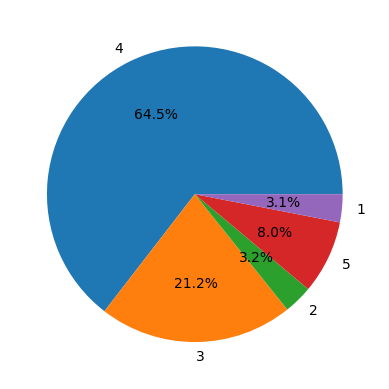

In [28]:
train_df = read_grouped_data()
train_df = change_txt_data(train_df)
Y = train_df['feeling_rate'].values
X = train_df.drop(['feeling_rate'], axis=1).values

calculate_feeling_rate_distribution(train_df)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=71830, stratify=Y)

param_grid = {'ccp_alpha': [0, 0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9, 10, None],
              'criterion' :['gini', 'entropy'],
              'splitter' : ['best', 'random'], 
              'class_weight' : [None, 'balanced']
             }

tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, scoring='f1_micro', cv=5, verbose=True)
grid_search.fit(X_train, Y_train)

final_model = grid_search.best_estimator_
final_model 